In [575]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 15, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())



'2017-07-31 15:26:33.196142'

In [576]:
plotter = ResultsPlotter(f='../IO/MyLakeResults.mat')

In [577]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')

/Users/MarkelovIgor/git/biogeochemistry/MyLake_v2_Vansjo/Postproc_code/data.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


### Phosphorus

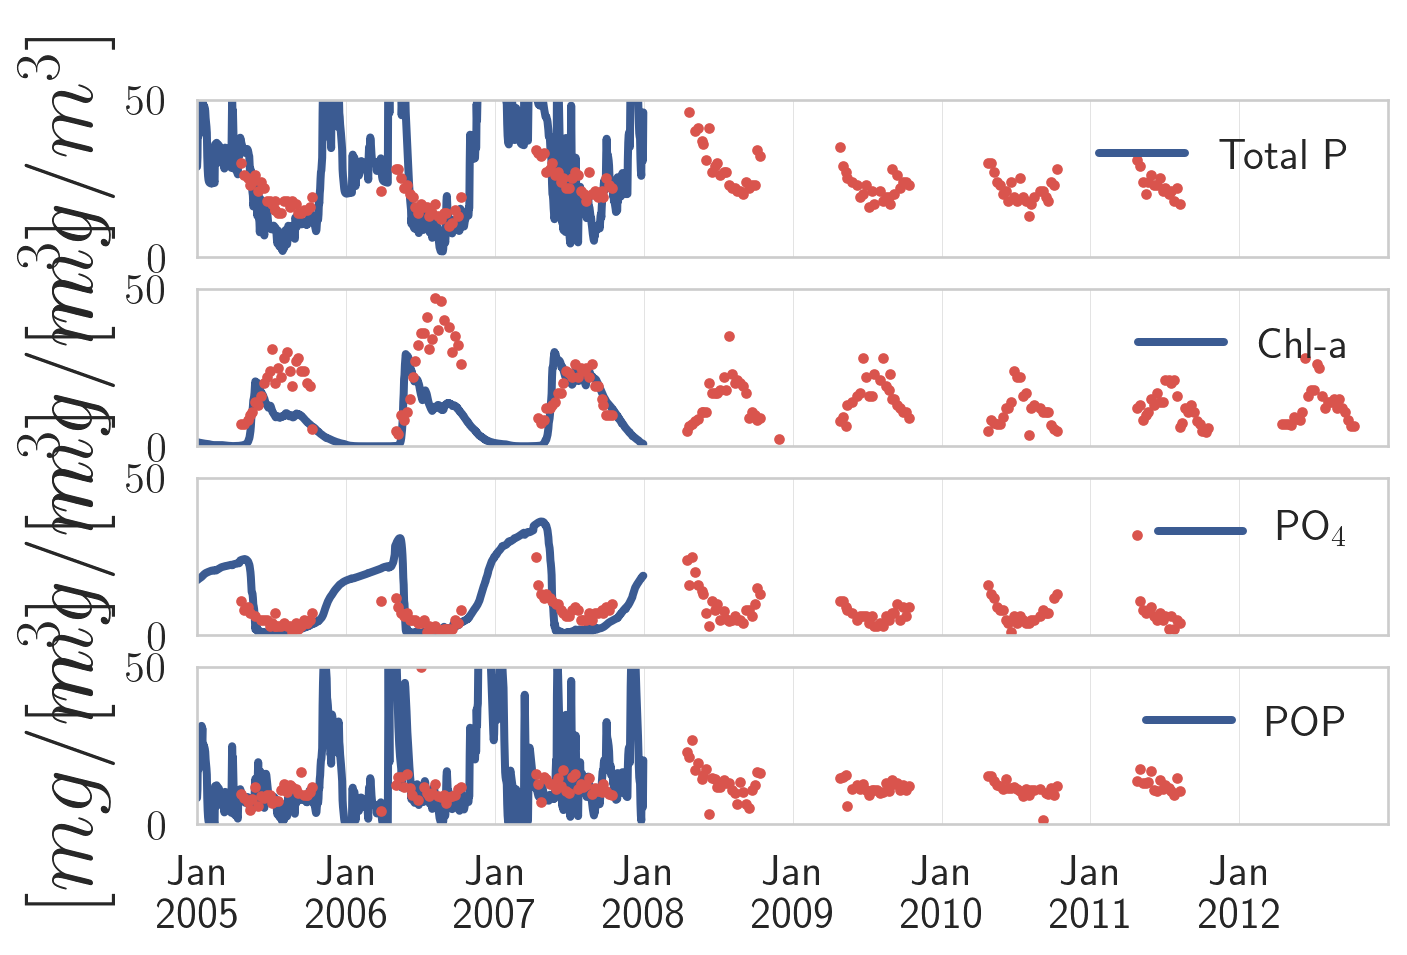

In [578]:
plotter.phosphorus_fit()

In [ ]:
df.columns

Index(['ProjectId', 'ProjectName', 'StationId', 'StationCode', 'StationName',
       'SampleDate', 'Depth1', 'Depth2', 'Alk_4.5', 'Blågrønnalger', 'Ca',
       'Dinoflagellater', 'Euglenoider', 'Farge',
       'Fytoplankton totalt biovolum', 'Grønnalger', 'Gulgrønnalger',
       'Gullalger', 'Kiselalger', 'KlfA', 'Kryptomonader', 'Microcystin',
       'Myalger', 'NH4-N', 'NO3-N', 'O2', 'O2 (metning)', 'pH', 'Phycocyanin',
       'PO4-P', 'PON', 'POP', 'Raphidop', 'SGR - Suspendert gløderest',
       'Siktdyp', 'SiO2', 'STS', 'Temperatur', 'TOC', 'TOTN', 'TOTP', 'TOTP_P',
       'Uspes_fytoplankton'],
      dtype='object')

In [ ]:
data.plot_depth(df, 'TOTP', depth=0)

In [ ]:
ax = plotter.plot_fit_wc('P', depth=4, dstart='2005-01-01', dend='2009-01-01', factor=1)
data.plot_depth(df, 'PO4-P', depth=0, ax=ax)

In [ ]:
ax = plotter.plot_fit_wc('POC', depth=4, dstart='2005-01-01', dend='2008-01-01', factor=1)
data.plot_depth(df, 'POP', depth=0, ax=ax)

### Oxygen

In [ ]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    f, ax = plt.subplots()
    ax = plotter.oxygen_fit_wc(depth=d, ax=ax)
    ax = data.plot_depth(df, 'O2', depth=d, ax=ax)

### NItrate

In [ ]:
ax = plotter.plot_fit_wc('NO3', depth=0, dstart='2006-01-01', dend='2011-01-01', factor=14/62)
data.plot_depth(df, 'NO3-N', depth=0, ax=ax)

### Temperature

In [ ]:
value = 'Temperatur'
df[['Depth1', value]].groupby('Depth1').count()

In [ ]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    f, ax = plt.subplots()
    ax = plotter.plot_fit_wc('T', depth=d, ax=ax, dstart='2005-01-01', dend='2014-01-01')
    ax = data.plot_depth(df, 'Temperatur', depth=d, ax=ax)

In [ ]:
d = 30
ax = plotter.plot_fit_wc('T', depth=d, dstart='2005-01-01', dend='2014-01-01')
data.plot_depth(df, 'Temperatur', depth=d)

In [ ]:
dstart = '2006-07-1'
dend = '2006-09-1'
d = 5
value = 'Temperatur'
df[(df.Depth1==d) & (np.isfinite(df[value])) & (df['SampleDate'] > datetime.strptime(dstart, '%Y-%m-%d')) & (df['SampleDate'] < datetime.strptime(dend, '%Y-%m-%d'))][['SampleDate', value]]

In [ ]:
d = 30
ax = plotter.plot_fit_wc('O2', depth=d, dstart='2006-01-01', dend='2011-01-01', factor=1e-3)
data.plot_depth(df, 'O2', depth=d)

### Phosphorus

In [ ]:
value = 'TOTP'
df[['Depth1', value]].groupby('Depth1').count()

In [ ]:
# ax = data.plot_depth(df, 'TOTP', depth=0)
ax = data.plot_depth(df, 'PO4-P', depth=0)
ax = data.plot_depth(df, 'POP', depth=0, ax=ax)
plt.legend()

In [ ]:
df.columns

In [ ]:
sum((df['TOTP'] - df['PO4-P'] - df['POP']) > 1)

In [ ]:
ax = plotter.plot_fit_wc('POC', depth=4, dstart='2005-01-01', dend='2006-01-01', factor=1)
data.plot_depth(df, 'POP', depth=0, ax=ax)